<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Hypothesis-Generation" data-toc-modified-id="Hypothesis-Generation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hypothesis Generation</a></span></li><li><span><a href="#Loading-Packages-and-Data" data-toc-modified-id="Loading-Packages-and-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Packages and Data</a></span></li><li><span><a href="#Understanding-the-Data" data-toc-modified-id="Understanding-the-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Understanding the Data</a></span><ul class="toc-item"><li><span><a href="#Inspect-Data" data-toc-modified-id="Inspect-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Inspect Data</a></span></li></ul></li><li><span><a href="#PreProcessing-Data" data-toc-modified-id="PreProcessing-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PreProcessing Data</a></span></li><li><span><a href="#Missing-Value-Treatment" data-toc-modified-id="Missing-Value-Treatment-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Missing Value Treatment</a></span></li><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Univariate Analysis</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Encoding-Categorical-Variables" data-toc-modified-id="Encoding-Categorical-Variables-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Encoding Categorical Variables</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Model Building</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Regularized-Linear-Regression" data-toc-modified-id="Regularized-Linear-Regression-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Regularized Linear Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

## Problem Statement

**Build a model to predict the doctor’s consulting fee**

## Hypothesis Generation

## Loading Packages and Data

In [70]:
#Loading libraries 
import warnings
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [71]:
trainOriginal = pd.read_excel('data/Final_Train.xlsx')
testOriginal = pd.read_excel('data/Final_Test.xlsx')

In [72]:
#loading data
train = pd.read_excel('data/Final_Train.xlsx')
test = pd.read_excel('data/Final_Test.xlsx')

## Understanding the Data

**This dataset contains the important information about a doctor such as:**

| FEATURES          | DETAILS                                        |
|-------------------|------------------------------------------------|
| Qualification     | Qualification and degrees held by the doctor   |
| Experience        | Experience of the doctor in number of years    |
| Rating            | Rating given by patients                       |
| Profile           | Type of the doctor                             |
| Miscellaeous_Info | Extra information about the doctor             |
| Fees              | Fees charged by the doctor                     |
| Place             | Area and the city where the doctor is located. |

### Inspect Data

In [73]:
print(train.shape) # Size of training set: 5961 records
print(test.shape) # Size of test set: 1987 records

(5961, 7)
(1987, 6)


In [74]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 5961 rows and 7 columns
----------------------------
The test data has 1987 rows and 6 columns


Combine Train and Test to avoid modification on each dataset separately, Later we can always split the combined data back to train and test.

In [75]:
data = train.append(test, ignore_index=False)
# bigdata = pd.concat([data1, data2], ignore_index=True) particularly helpful when you are joining more than two dataframes:
print(data.head())
print(data.tail())

            Experience   Fees  \
0  24 years experience  100.0   
1  12 years experience  350.0   
2   9 years experience  300.0   
3  12 years experience  250.0   
4  20 years experience  250.0   

                                  Miscellaneous_Info  \
0               100% 16 Feedback Kakkanad, Ernakulam   
1              98% 76 Feedback Whitefield, Bangalore   
2                                                NaN   
3  Bannerghatta Road, Bangalore ₹250 Available on...   
4              100% 4 Feedback Keelkattalai, Chennai   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                    Qualification Rating  
0           BHMS, MD - Homeopathy   100%  
1    BAMS, MD - Ayurveda Medicine    98%  
2  MBBS, MS - Otorhinolaryng

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
Experience            7948 non-null object
Fees                  5961 non-null float64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
dtypes: float64(1), object(6)
memory usage: 496.8+ KB


## PreProcessing Data

In [77]:
data['Experience'] = data['Experience'].map(lambda x: x.strip('years experience')).astype(float)
print(data.head())
print(data.tail())

   Experience   Fees                                 Miscellaneous_Info  \
0        24.0  100.0               100% 16 Feedback Kakkanad, Ernakulam   
1        12.0  350.0              98% 76 Feedback Whitefield, Bangalore   
2         9.0  300.0                                                NaN   
3        12.0  250.0  Bannerghatta Road, Bangalore ₹250 Available on...   
4        20.0  250.0              100% 4 Feedback Keelkattalai, Chennai   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                    Qualification Rating  
0           BHMS, MD - Homeopathy   100%  
1    BAMS, MD - Ayurveda Medicine    98%  
2  MBBS, MS - Otorhinolaryngology    NaN  
3             BSc - Zoology, BAMS    NaN  
4                          

In [78]:
data['Rating'] = data['Rating'].str.replace('%','').astype(float)
print(data.head())
print(data.tail())

   Experience   Fees                                 Miscellaneous_Info  \
0        24.0  100.0               100% 16 Feedback Kakkanad, Ernakulam   
1        12.0  350.0              98% 76 Feedback Whitefield, Bangalore   
2         9.0  300.0                                                NaN   
3        12.0  250.0  Bannerghatta Road, Bangalore ₹250 Available on...   
4        20.0  250.0              100% 4 Feedback Keelkattalai, Chennai   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                    Qualification  Rating  
0           BHMS, MD - Homeopathy   100.0  
1    BAMS, MD - Ayurveda Medicine    98.0  
2  MBBS, MS - Otorhinolaryngology     NaN  
3             BSc - Zoology, BAMS     NaN  
4                     

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
Experience            7948 non-null float64
Fees                  5961 non-null float64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null float64
dtypes: float64(3), object(4)
memory usage: 496.8+ KB


## Missing Value Treatment

In [80]:
#check missing values
data.columns[train.isnull().any()]

Index(['Miscellaneous_Info', 'Place', 'Qualification'], dtype='object')

Out of 7 features, 3 features have missing values. Let's check the percentage of missing values in these columns.

In [81]:
#missing value counts in each of these columns
miss = data.isnull().sum()/len(data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Place                 0.003900
Fees                  0.250000
Miscellaneous_Info    0.434575
Rating                0.552592
dtype: float64

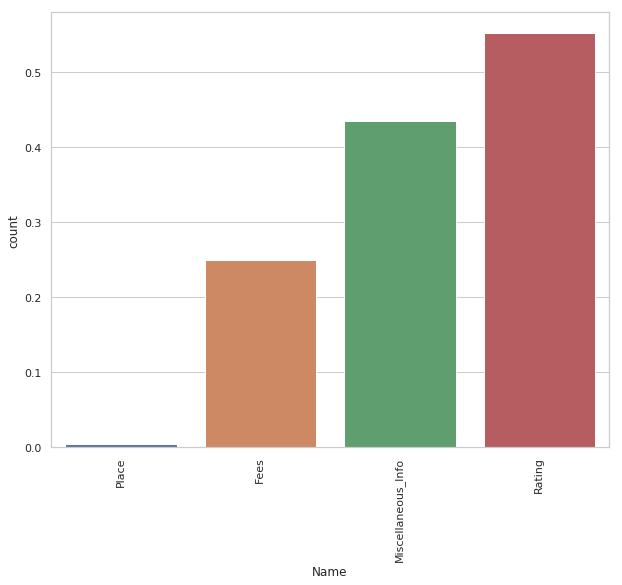

In [82]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()
# sns.plt.show()

In [83]:
data['Place'] = data['Place'].str.replace('Dwarka, Sector 5','Dwarka Sector 5')

In [84]:
data['Place'][2169]

'Dwarka Sector 5, Delhi'

In [85]:
data.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24.0,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100.0
1,12.0,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98.0
2,9.0,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12.0,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20.0,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100.0


In [86]:
data.insert(loc=4, column='PlaceNew', value=np.NaN)
data.head()

,Experience,Fees,Miscellaneous_Info,Place,PlaceNew,Profile,Qualification,Rating
0,24.0,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",NaN,Homeopath,"BHMS, MD - Homeopathy",100.0
1,12.0,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",NaN,Ayurveda,"BAMS, MD - Ayurveda Medicine",98.0
2,9.0,300.0,NaN,"Mathikere - BEL, Bangalore",NaN,ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12.0,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",NaN,Ayurveda,"BSc - Zoology, BAMS",NaN
4,20.0,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",NaN,Ayurveda,BAMS,100.0


In [87]:
data[['Place','PlaceNew']] = data.Place.str.split(",",expand=True,)
data.head()

,Experience,Fees,Miscellaneous_Info,Place,PlaceNew,Profile,Qualification,Rating
0,24.0,100.0,"100% 16 Feedback Kakkanad, Ernakulam",Kakkanad,Ernakulam,Homeopath,"BHMS, MD - Homeopathy",100.0
1,12.0,350.0,"98% 76 Feedback Whitefield, Bangalore",Whitefield,Bangalore,Ayurveda,"BAMS, MD - Ayurveda Medicine",98.0
2,9.0,300.0,NaN,Mathikere - BEL,Bangalore,ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12.0,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...",Bannerghatta Road,Bangalore,Ayurveda,"BSc - Zoology, BAMS",NaN
4,20.0,250.0,"100% 4 Feedback Keelkattalai, Chennai",Keelkattalai,Chennai,Ayurveda,BAMS,100.0


Let's proceed and check the distribution of the target variable.

(array([ 132., 1564., 1216., 1010.,  490.,  961.,  237.,  187.,  144.,
          20.]),
 array([  5. ,  99.5, 194. , 288.5, 383. , 477.5, 572. , 666.5, 761. ,
        855.5, 950. ]),
 <a list of 10 Patch objects>)

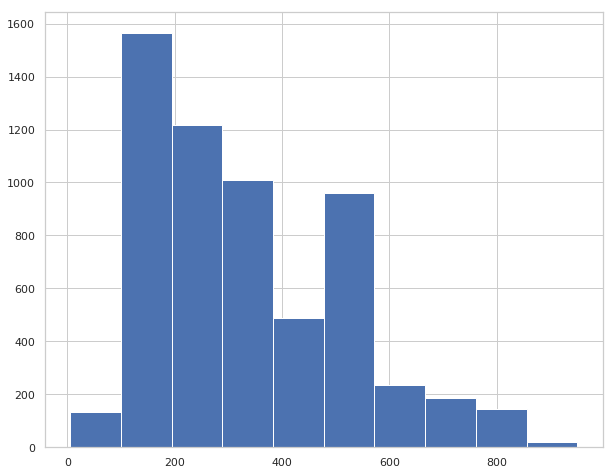

In [88]:
#Fees
plt.hist(data['Fees'])

In [89]:
#skewness
print ("The skewness of SalePrice is {}".format(data['Fees'].skew()))

The skewness of SalePrice is 0.7518701683331586


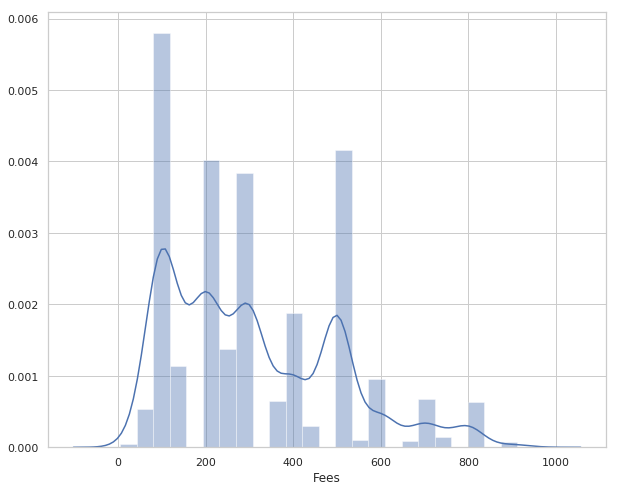

In [90]:
#Fees                  
sns.distplot(train['Fees']);

In [91]:
#separate variables into new data frames
numeric_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 3 numeric and 5 categorical columns in train data


In [ ]:
# data.Miscellaneous_Info.str.extract('(\d+)')
# data['Miscellaneous_Info'].str.extract('(\d+)').astype(float)
# In the column 'raw', extract single digit in the strings


# data['Miscellaneous_Info'] = data['Miscellaneous_Info'].str.extract('(\d)', expand=True)
# print(data['Miscellaneous_Info'])
# print(data.head())

**Extract numers from string**

In [92]:
# Find the numeric values: matches
matches = data['Miscellaneous_Info'].str.findall('\d+')

# Print the matches
print(matches)

0       [100, 16]
1        [98, 76]
2             NaN
3       [250, 10]
4        [100, 4]
5             NaN
6             NaN
7              []
8             NaN
9             NaN
10            NaN
11            NaN
12       [98, 14]
13             []
14            NaN
15            NaN
16            NaN
17            NaN
18        [79, 8]
19       [100, 4]
20       [100, 7]
21             []
22            NaN
23            NaN
24            NaN
25            NaN
26      [100, 46]
27        [95, 6]
28            NaN
29       [97, 60]
          ...    
1957    [100, 12]
1958     [53, 12]
1959           []
1960           []
1961     [3, 500]
1962    [100, 23]
1963          NaN
1964          NaN
1965      [88, 5]
1966          NaN
1967           []
1968     [96, 12]
1969          NaN
1970          NaN
1971           []
1972     [93, 36]
1973           []
1974          NaN
1975          [1]
1976     [84, 20]
1977     [1, 000]
1978     [1, 000]
1979           []
1980    [98, 240]
1981      

In [96]:
len(data)

7948

find uniqueness

In [23]:
print(data['Qualification'].unique())
print(data['Place'].unique())
print(data['Profile'].unique())

['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine'
 'MBBS, MS - General Surgery, FAIS, FIAGES'
 'MBBS, MD / MS - Obstetrics & Gynaecology']
['Kakkanad' 'Whitefield' 'Mathikere - BEL' 'Bannerghatta Road'
 'Keelkattalai' 'Porur' 'Karol Bagh' 'Arekere' 'Old City' 'Athani'
 'Thousand Lights' 'Somajiguda' 'Coimbatore Racecourse' 'Jubilee Hills'
 'Kondli' 'Saroor Nagar' 'Tambaram West' 'Purasawakkam' 'KPHB'
 'HSR Layout' 'Pollachi' 'Vasundhra Enclave' 'Chembur' 'Thammanam'
 'Andheri' 'Pattom' 'Kukatpally' 'Vadavalli' 'Defence Colony'
 'Banjara Hills' 'Sion West' 'CR Park' 'Mogappair East' 'IP Extension'
 'Safdarjung Enclave' 'New Friends Colony' 'Borivali West' 'Saket' 'Malad'
 'Hyder Nagar' 'Dahisar West' 'RT Nagar' 'Powai' 'Basheerbagh'
 'Musheerabad' 'AS Rao Nagar' 'Madhapur' 'Gandhinagar' 'Chetpet'
 'Vileparle East' 'Yelahanka New Town' 'Kodambakkam' 'M

## Univariate Analysis

## Bivariate Analysis

## Feature Engineering

## Feature Engineering

## Encoding Categorical Variables

## Model Building

## Linear Regression

## Regularized Linear Regression

## Random Forest

## XGBoost

## Summary